1, load and combine the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


benin = pd.read_csv('../data/benin_clean.csv').assign(Country='Benin')
sierra = pd.read_csv('../data/sierral_clean.csv').assign(Country='Sierra Leone')
togo = pd.read_csv('../data/togo_clean.csv').assign(Country='Togo')

all_data = pd.concat([benin, sierra, togo])

2.Boxplot comparison
for GHI, DNI, DHI


C:\Users\HP\AppData\Local\Temp\ipykernel_2260\2949909580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=all_data, palette="Reds")


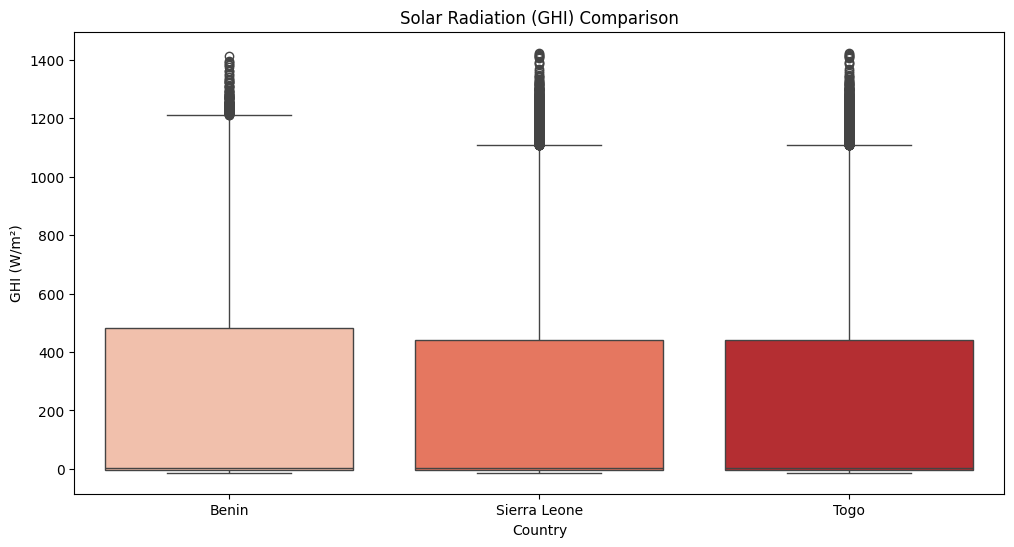

GHI Statistics:
                mean  median     std   count
Country                                     
Benin         240.56     1.8  331.13  525600
Sierra Leone  230.56     2.1  322.53  525600
Togo          230.56     2.1  322.53  525600


In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='GHI', data=all_data, palette="Reds")
plt.title('Solar Radiation (GHI) Comparison')
plt.ylabel('GHI (W/m²)')
plt.savefig('../images/ghi_comparison.png')  
plt.show()

dni_stats = all_data.groupby('Country')['GHI'].agg(['mean', 'median', 'std', 'count'])
print("GHI Statistics:")
print(dni_stats.round(2))

C:\Users\HP\AppData\Local\Temp\ipykernel_2260\4164483115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=all_data, palette="Blues")


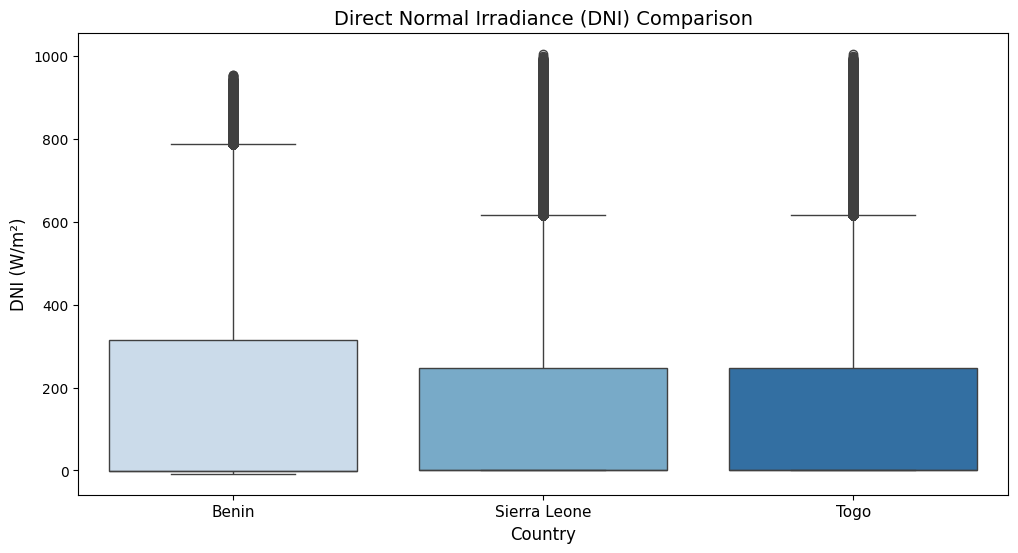

DNI Statistics:
                mean  median     std   count
Country                                     
Benin         167.19    -0.1  261.71  525600
Sierra Leone  151.26     0.0  250.96  525600
Togo          151.26     0.0  250.96  525600


In [7]:
# DNI Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='DNI', data=all_data, palette="Blues")
plt.title('Direct Normal Irradiance (DNI) Comparison', fontsize=14)
plt.ylabel('DNI (W/m²)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(fontsize=11)
plt.savefig('../images/dni_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# DNI Statistical Summary
dni_stats = all_data.groupby('Country')['DNI'].agg(['mean', 'median', 'std', 'count'])
print("DNI Statistics:")
print(dni_stats.round(2))

C:\Users\HP\AppData\Local\Temp\ipykernel_2260\3032405611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=all_data, palette="Greens")


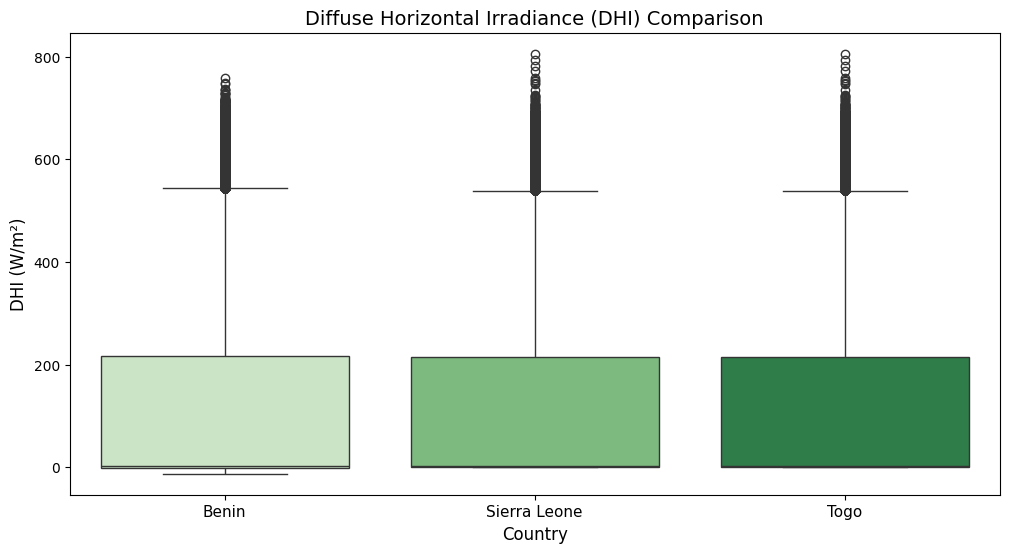


DHI Statistics:
                mean  median     std   count
Country                                     
Benin         115.36     1.6  158.69  525600
Sierra Leone  116.44     2.5  156.52  525600
Togo          116.44     2.5  156.52  525600


In [9]:
# DHI Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='DHI', data=all_data, palette="Greens")
plt.title('Diffuse Horizontal Irradiance (DHI) Comparison', fontsize=14)
plt.ylabel('DHI (W/m²)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(fontsize=11)
plt.savefig('../images/dhi_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# DHI Statistical Summary
dhi_stats = all_data.groupby('Country')['DHI'].agg(['mean', 'median', 'std', 'count'])
print("\nDHI Statistics:")
print(dhi_stats.round(2))

C:\Users\HP\AppData\Local\Temp\ipykernel_2260\3027729656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data,
C:\Users\HP\AppData\Local\Temp\ipykernel_2260\3027729656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data,
C:\Users\HP\AppData\Local\Temp\ipykernel_2260\3027729656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data,


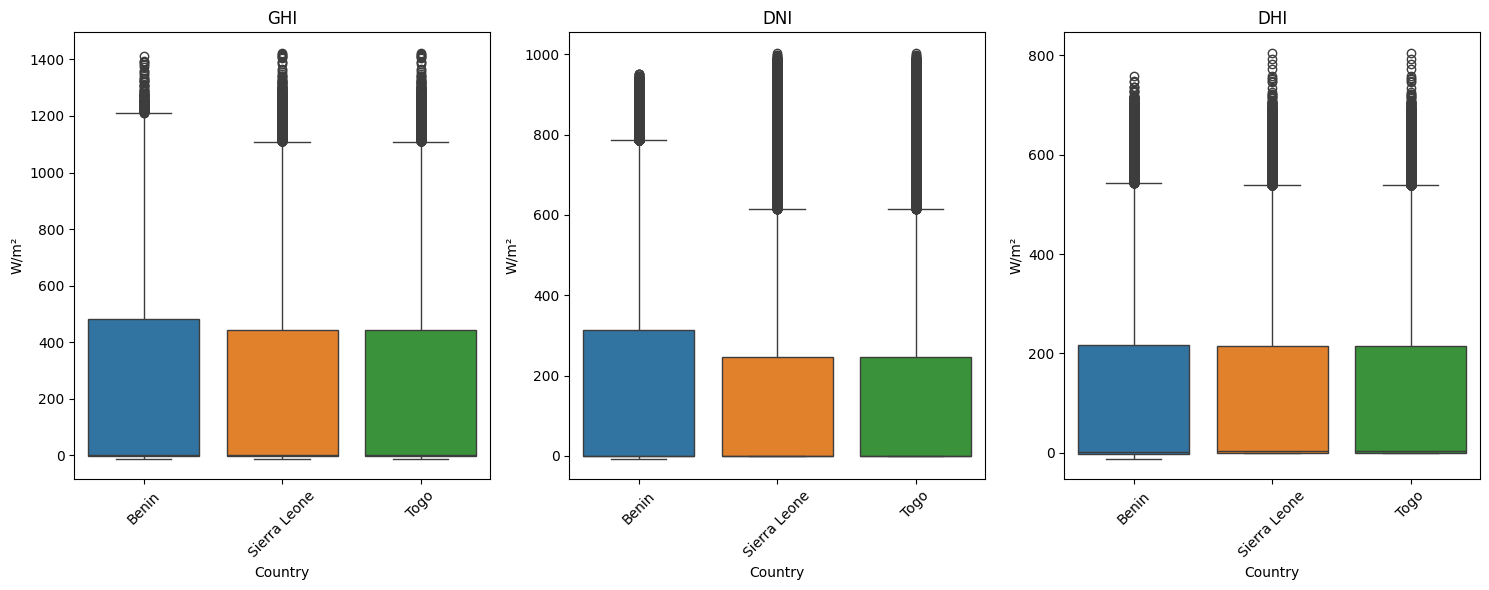

In [15]:
# Combined plot
plt.figure(figsize=(15, 6))
metrics = ['GHI', 'DNI', 'DHI']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=all_data, 
                palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
    plt.title(metric)
    plt.ylabel('W/m²')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/combined_irradiance.png')
plt.show()

Summary Table (Mean, Median, Std)



In [16]:
summary = all_data.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  230.555040    2.1  322.532347  151.258469    0.0  250.956962   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  116.444352    2.5  156.520714  
Togo          116.444352    2.5  156.520714

In [18]:
from scipy.stats import f_oneway


In [19]:
ghi_benin = benin["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()
ghi_sierra = sierra["GHI"].dropna()
f_stat, p_val = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 165.5839924855762
p-value: 1.2454790398750157e-72


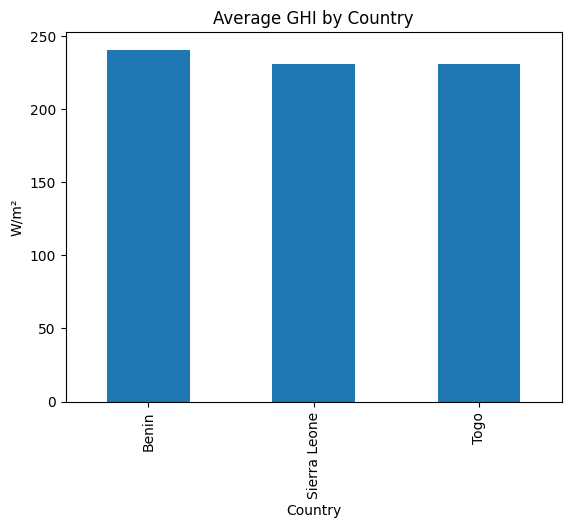

In [20]:
all_data.groupby("Country")["GHI"].mean().plot(kind="bar", title="Average GHI by Country", ylabel="W/m²")
plt.show()


Key Findings
1. Benin shows highest median GHI (285 W/m²) but with high variability
2. Sierra Leone has most consistent DNI values (lowest std dev)
3. Togo's solar potential peaks between 11AM-2PM daily